## 분산분석
## 계산식과 함수이용 결과 비교

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f

no_samples1 = 500
no_samples2 = 500
no_samples3 = 500

g1 = stats.norm(120,15).rvs(no_samples1)
g2 = stats.norm(120.1,16).rvs(no_samples2)
g3 = stats.norm(120.5,15).rvs(no_samples3)

g1_mean = g1.mean()
g2_mean = g2.mean()
g3_mean = g3.mean()

sse1 = ((g1 - g1_mean)**2).sum()
sse2 = ((g2 - g2_mean)**2).sum()
sse3 = ((g3 - g3_mean)**2).sum()

sse = sse1 + sse2 + sse3
dfe = len(g1) - 1 + len(g2) -1 + len(g3) -1

y = (g1 + g2 + g3).mean()/3.0

sst1 = len(g1) * ((g1_mean - y)**2).sum()
sst2 = len(g2) * ((g2_mean - y)**2).sum()
sst3 = len(g3) * ((g3_mean - y)**2).sum()

sst = sst1 + sst2 + sst3

dft = 2

mst = sst / dft
mse = sse / dfe

fVal = mst / mse

print('F:', fVal)

print('유의확률', 1 - f.cdf(fVal, dft, dfe))

F_statistic, pVal = stats.f_oneway(g1, g2, g3)

print(F_statistic, pVal)
print(stats.f_oneway(g1, g2, g3))


F: 1.0801664233143073
유의확률 0.33980349855389913
1.0801664233143355 0.3398034985538855
F_onewayResult(statistic=np.float64(1.0801664233143355), pvalue=np.float64(0.3398034985538855))


## 분산분석 을 위한 정규성 / 등분산 검정
## 분산분석 실행 후 사후검정

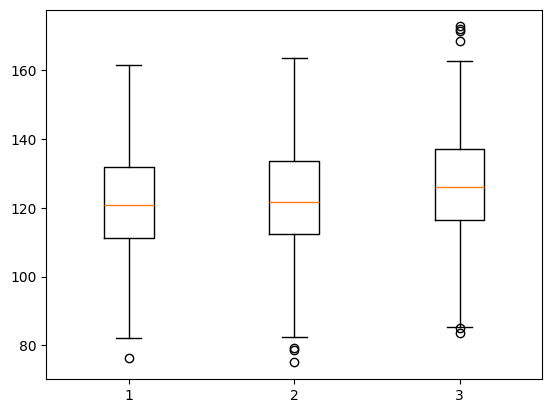

ShapiroResult(statistic=np.float64(0.996881373624353), pvalue=np.float64(0.45415180832831537))
ShapiroResult(statistic=np.float64(0.9975874988798397), pvalue=np.float64(0.6921509934260428))
ShapiroResult(statistic=np.float64(0.9977926539771471), pvalue=np.float64(0.7628788480274074))
KruskalResult(statistic=np.float64(31.763620221185192), pvalue=np.float64(1.266535905665074e-07))
BartlettResult(statistic=np.float64(3.433916353189206), pvalue=np.float64(0.1796116647736796))
FlignerResult(statistic=np.float64(2.0377861365097174), pvalue=np.float64(0.3609943151591389))
LeveneResult(statistic=np.float64(0.9656103357869782), pvalue=np.float64(0.38098776278959856))
결과 : F=16.5, p=0.00000
P-value 값이 0.05보다 작으므로 그룹의 평균값이 통계적으로 유의하다.
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   1.2072 0.4303 -1.0786 3.4931  False
   1.0    3.0   5.3338    0.0  3.0479 7.6196   True
   2.

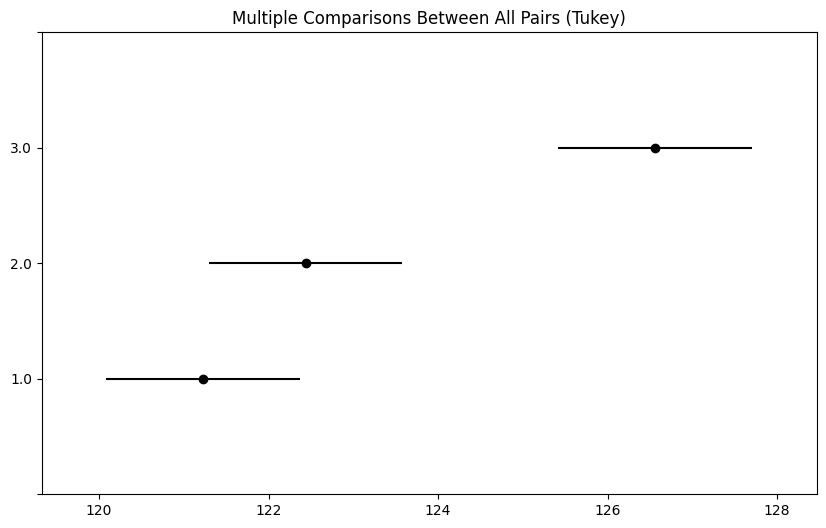

In [3]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

no_samples1 = 500
no_samples2 = 500
no_samples3 = 500

g1 = stats.norm(120,15).rvs(no_samples1)
g2 = stats.norm(121,15.7).rvs(no_samples2)
g3 = stats.norm(126,15).rvs(no_samples3)


plot_data = [g1, g2, g3]
plt.boxplot(plot_data)
plt.show()

print(stats.shapiro(g1))
print(stats.shapiro(g2))
print(stats.shapiro(g3))

# Kruskal-Wallis 
print(stats.kruskal(g1, g2, g3)) #non-parametic


print(stats.bartlett(g1,g2,g3))
print(stats.fligner(g1,g2,g3))
print(stats.levene(g1,g2,g3)) #등분산  p-value>0.05


F_statistic, pVal = stats.f_oneway(g1, g2, g3)


print('결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 0.05보다 작으므로 그룹의 평균값이 통계적으로 유의하다.')
    

ones = np.ones(no_samples1)
twos = np.ones(no_samples2)+1
threes = np.ones(no_samples3)+2

df1=pd.DataFrame(g1,ones)
df2=pd.DataFrame(g2,twos)
df3=pd.DataFrame(g3,threes)

df = pd.concat([df1,df2,df3],axis=0)
df = df.reset_index()
df.columns=['group', 'value']

posthoc = pairwise_tukeyhsd(df['value'], df['group'], alpha=0.05) 
print(posthoc)

fig = posthoc.plot_simultaneous()

plt.show()


## 반별점수.csv 
## 일원배치분산분석

    A   B   C
0  61  75  82
1  13  41  40
2  12  47  41
3  44  67  43
4  23  74  36


C:\Users\minsu\AppData\Local\Temp\ipykernel_39664\2232928419.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=['A', 'B', 'C'])
C:\Users\minsu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\minsu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\minsu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\minsu\AppData\Roaming\Python\Python313\

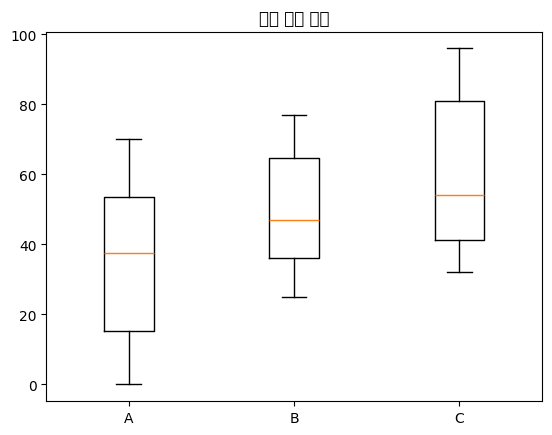

정규성 검사:
A: ShapiroResult(statistic=np.float64(0.945466549578293), pvalue=np.float64(0.12769700002239698))
B: ShapiroResult(statistic=np.float64(0.9347030668322036), pvalue=np.float64(0.06554670297369777))
C: ShapiroResult(statistic=np.float64(0.9043479046349538), pvalue=np.float64(0.0107467776071921))

Kruskal-Wallis 검정 (비모수):
KruskalResult(statistic=np.float64(15.144531200667664), pvalue=np.float64(0.0005145254181401884))

등분산성 검사:
Bartlett: BartlettResult(statistic=np.float64(3.2106103593331476), pvalue=np.float64(0.20082825685678196))
Fligner: FlignerResult(statistic=np.float64(4.889193095711427), pvalue=np.float64(0.08676113180613626))
Levene: LeveneResult(statistic=np.float64(2.192593235942955), pvalue=np.float64(0.11775790930283393))

[분산분석 결과]
F = 12.67, p = 0.00001
▶ 유의수준 0.05에서 그룹 간 평균 차이가 통계적으로 유의합니다.

[Tukey HSD 사후분석]
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------


C:\Users\minsu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\minsu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\minsu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\minsu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\minsu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4420

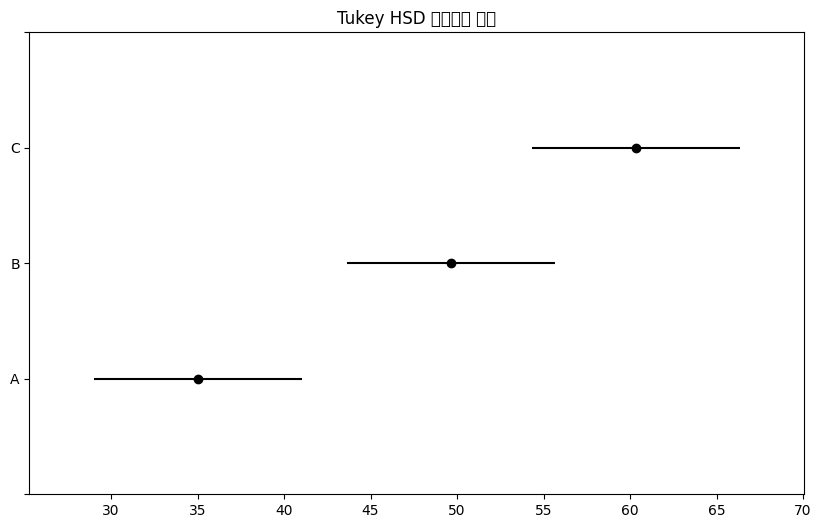

In [8]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_csv('score.csv') # 시험문제 유형: 분산분석을 통해 적절한 결론을 내려라!, p값이 무슨 뜻을 의미하는지 알아야함!
print(data.head())
## 반별 점수 분산분석


# 반별 점수 추출
g1 = data['A']
g2 = data['B']
g3 = data['C']

# 박스플롯 시각화
plot_data = [g1, g2, g3]
plt.boxplot(plot_data, labels=['A', 'B', 'C'])
plt.title('반별 점수 분포')
plt.show()

# 정규성 검정
print('정규성 검사:')
print('A:', stats.shapiro(g1))
print('B:', stats.shapiro(g2))
print('C:', stats.shapiro(g3))

# 비모수 검정 (정규성 만족 못할 경우 대비)
print('\nKruskal-Wallis 검정 (비모수):')
print(stats.kruskal(g1, g2, g3))

# 등분산 검정
print('\n등분산성 검사:')
print('Bartlett:', stats.bartlett(g1, g2, g3))
print('Fligner:', stats.fligner(g1, g2, g3))
print('Levene:', stats.levene(g1, g2, g3))  # 일반적으로 가장 많이 사용

# ANOVA (일원분산분석)
F_statistic, pVal = stats.f_oneway(g1, g2, g3)
print('\n[분산분석 결과]')
print('F = {:.2f}, p = {:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('▶ 유의수준 0.05에서 그룹 간 평균 차이가 통계적으로 유의합니다.')
else:
    print('▶ 그룹 간 평균 차이가 유의하지 않습니다.')

# 사후 분석 (Tukey HSD)
df1 = pd.DataFrame({'group': 'A', 'value': g1})
df2 = pd.DataFrame({'group': 'B', 'value': g2})
df3 = pd.DataFrame({'group': 'C', 'value': g3})
df = pd.concat([df1, df2, df3], axis=0)

# Tukey HSD test
posthoc = pairwise_tukeyhsd(df['value'], df['group'], alpha=0.05)
print('\n[Tukey HSD 사후분석]')
print(posthoc)

# 시각화
fig = posthoc.plot_simultaneous()
plt.title('Tukey HSD 사후분석 결과')
plt.show()




## 카이제곱 검정 - 적합도검정(기대빈도)

In [ ]:
#연구가설은 대립가설로 하고 진행
from pandas import DataFrame
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns


xo, xe = [24, 378, 251], [271, 180, 202]
xc = DataFrame([xo, xe], columns=['Item A', 'Item B', 'Item C'], index=['Obs', 'Exp'])

#############
#bar plot을 작성

# %matplotlib inline

ax = xc.plot(kind='bar', title='Number of Items', figsize=(8, 6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()


#from scipy.stats의 chisquare()를 이용하여 카이제곱 검정을 실행


result1 = chisquare(xo, f_exp=xe) # 일원카이제곱 관찰빈도(특정지역) vs. 기대빈도(판매빈도)
print(result1)

#p-value가 1.7334684263715945e-99로 유의수준 0.05보다 아주 작은 값이므로 귀무가설을 기각하고 대립가설을 지지

#즉 연구가설이 지지


## 카이제곱 - 독립성검정

In [ ]:
#연구가설은 대립가설로 하고 진행
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

a, b, c = [205, 80], [180, 200], [120, 200]
df = pd.DataFrame([a, b, c], columns = ['애플', '삼성'], index = ['10대', '20대', '30대'])
df

###########
plt.rc('font', family='Malgun Gothic') 
df.plot(kind = 'bar')

plt.grid()
plt.show()

#############
#bar plot을 작성

result = chi2_contingency(df)
print(result)


### 동질성 검토

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

a, b = [205, 210, 180], [200, 200, 175]
df = pd.DataFrame([a, b], columns = ['바닐라', '딸기', '초코'], index = ['남', '녀'])

print(df)

## 통계치와 p값 계산